In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 15

In [2]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS*.dat.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_S_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits


In [3]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_S_clustering.dat.fits')

In [4]:
data = Table(np.hstack((N, S)))
data

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.368794267525197,1.0202607,2.0,1.1608769635685512,7.7169294,16.809292,28.698618,21.945616,12.552565,0.01856145426373512,0.016762400045732102,0.721548822097457,-0.0480892836645471,0.07562442170381622,0.17676402087349832,0.38471493423821956,0.637311614101099,-0.15613073097339897,-0.15613073097339897,-19.01505339080518,-19.239906695343226
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.885935437241774,1.0119702,7.0,1.1132365826456456,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008661962234134126,0.03524444880947024,0.8916872718248806,0.055141909042679765,0.4068761917832286,0.28235492619244257,0.7782674152354703,0.7475090655224019,-0.21942194265581827,-0.21942194265581827,-19.934640009395764,-20.16185302654553
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.5493453409436366,1.0191563,3.0,1.1608769635685512,9.199382,18.115196,31.323214,38.144897,31.80481,0.011911149469520776,0.025879084952906813,0.5397214238839109,-0.06256931584764004,0.13341940431141774,0.14342391928728798,0.37673369579311694,0.5024003675371398,-0.19894310333982812,-0.19894310333982812,-19.621429255164735,-19.82742249029966
39633378638561503,0.3053206447975358,1,20001,270.5073482253405,59.33896919077583,2.3158908743540527,1.0118785,2.0,1.1443522597899662,5.816003,24.00663,49.666294,60.648766,39.263374,0.0032132398416806277,0.08965087986982612,0.948196974030458,0.1920467162085221,0.783116328481775,0.4201382412002311,1.1720507422145277,0.7873540852894143,-0.2961610254536097,-0.2961610254536097,-21.06440409622748,-21.29249562121919
39633372376467396,0.2775320962351793,1,20001,268.5121713053863,58.81550252397294,3.2715555825991145,1.0216688,3.0,1.067389487000734,4.9087415,18.647816,47.224636,121.78173,128.69661,0.006279602345083299,0.047974048180681544,0.9314978452803849,0.14147467853484277,0.6591231040064112,0.36796505192895507,1.0449898286507322,0.7721214940301759,-0.26920613334812393,-0.26920613334812393,-20.528724008118733,-20.755214381512847
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,3.3792646040688217,1.0118438,3.0,1.1132365826456456,65.581665,164.53503,310.0892,251.75818,156.65999,0.026715267796619462,0.011706208574030397,0.9793147837596916,-0.09317160654032018,-0.07379673881075391,0.1383131834916128,0.320207896877415,0.8167949381034556,-0.10427710898306469,-0.10427710898306469,-20.549183985528458,-20.78066877556039
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.65722136226266,1.0163556,5.0,1.1132365826456456,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008661962234134126,0.03524444880947024,0.9539436956606155,0.08093321342091594,0.4764215093374489,0.30965139400867076,0.8662922728465651,0.7927911127392542,-0.22672561513580225,-0.22672561513580225,-20.049808198242104,-20.27852637882986
39633366051455429,0.2274295421540546,1,20001,268.86868202000977,58.30892044280674,2.274872090138421,1.0217379,2.0,1.1132365826456456,24.459436,80.40709,158.21242,162.85123,116.77073,0.008661962234134126,0.03524444880947024,0.922871669122532,0.06516651677486968,0.43441482751073607,0.2918134730009922,0.8171449928840472,0.7667884599753434,-0.22060665588943296,-0.22060665588943296,-21.597261119229156,-21.82390807545528
39633366051455137,0.10835235408674397,1,20001,268.8319239967375,58.17904527599571,1.1271243570102703,1.0124751,1.0,1.1132365826456456,23.193655,33.353035,

In [5]:
data.dtype.names

('TARGETID',
 'Z',
 'NTILE',
 'TILES',
 'RA',
 'DEC',
 'WEIGHT',
 'WEIGHT_ZFAIL',
 'WEIGHT_COMP',
 'WEIGHT_SYS',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'NZ',
 'WEIGHT_FKP',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_RP1',
 'ABSMAG_RP0')

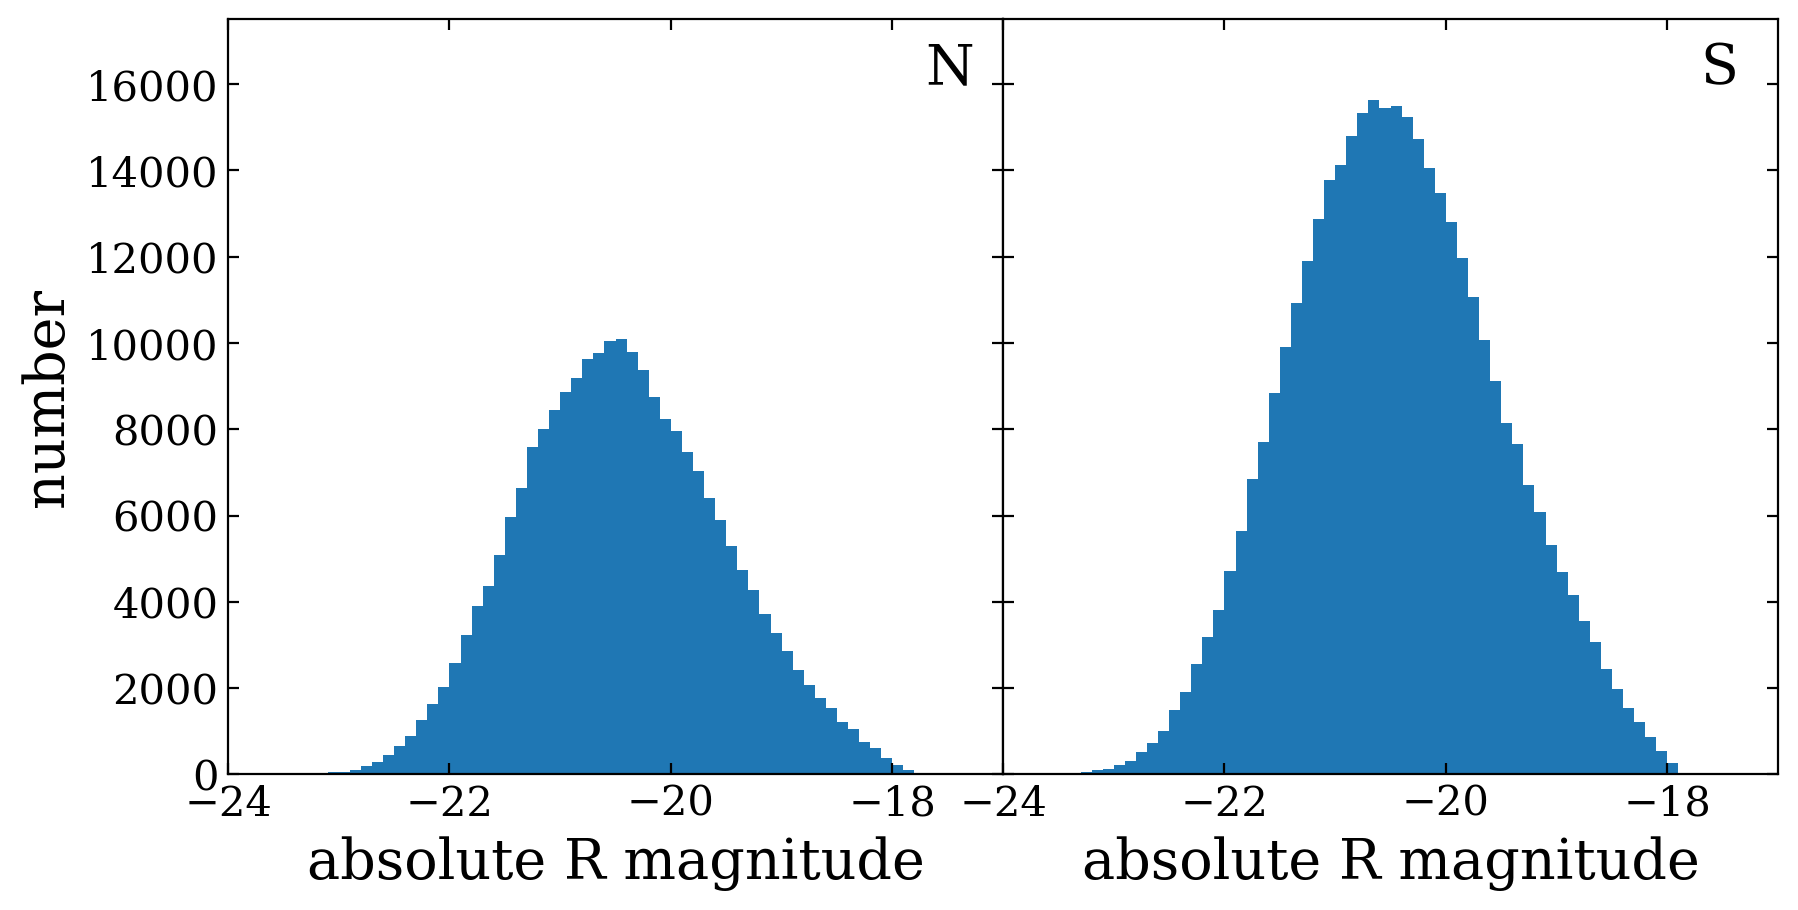

In [6]:
s=20
plt.figure(figsize=(10,5),dpi=200)
M_range = np.arange(-25,-10,0.1)
ax1 = plt.subplot(121)
plt.text(-17.7,16000,'N', size=s)
ax1.hist(N['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,17500)
plt.xlim(-24,-17)
#plt.xticks([-24,-23,-22,-21,-20,-19,-18])

ax2 = plt.subplot(122)
plt.text(-17.7,16000,'S', size=s)
ax2.hist(S['ABSMAG_RP1'], bins=M_range)
plt.xlabel('absolute R magnitude', size=s)
ax2.set_yticklabels([])
plt.ylim(0,17500)
plt.xlim(-24,-17)

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.savefig('../figures/interim/da02_abs_rmag_hist.png')

N maglim: 19.539993 ; S maglim: 19.5

In [7]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

/tmp/ipykernel_25152/3933311458.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_25152/3933311458.py:7: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_25152/3933311458.py:12: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])


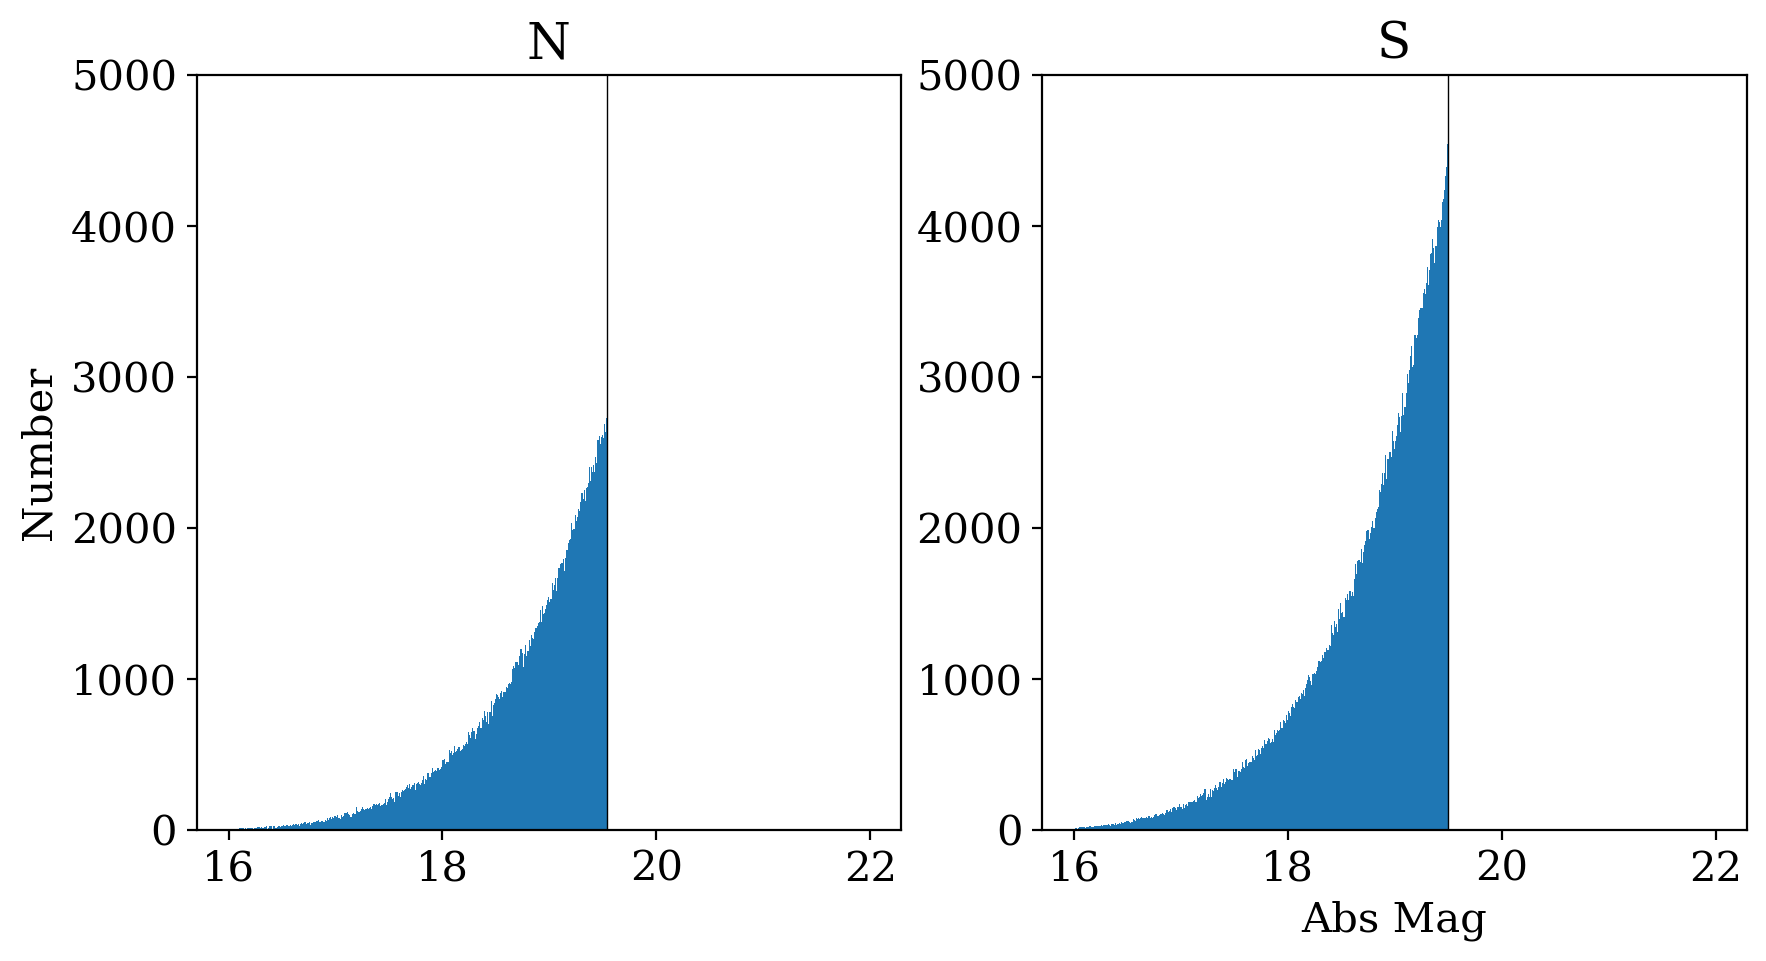

In [8]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.539993,19.539993],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.xlabel('Abs Mag')


plt.show()

Rest frame g-r colour

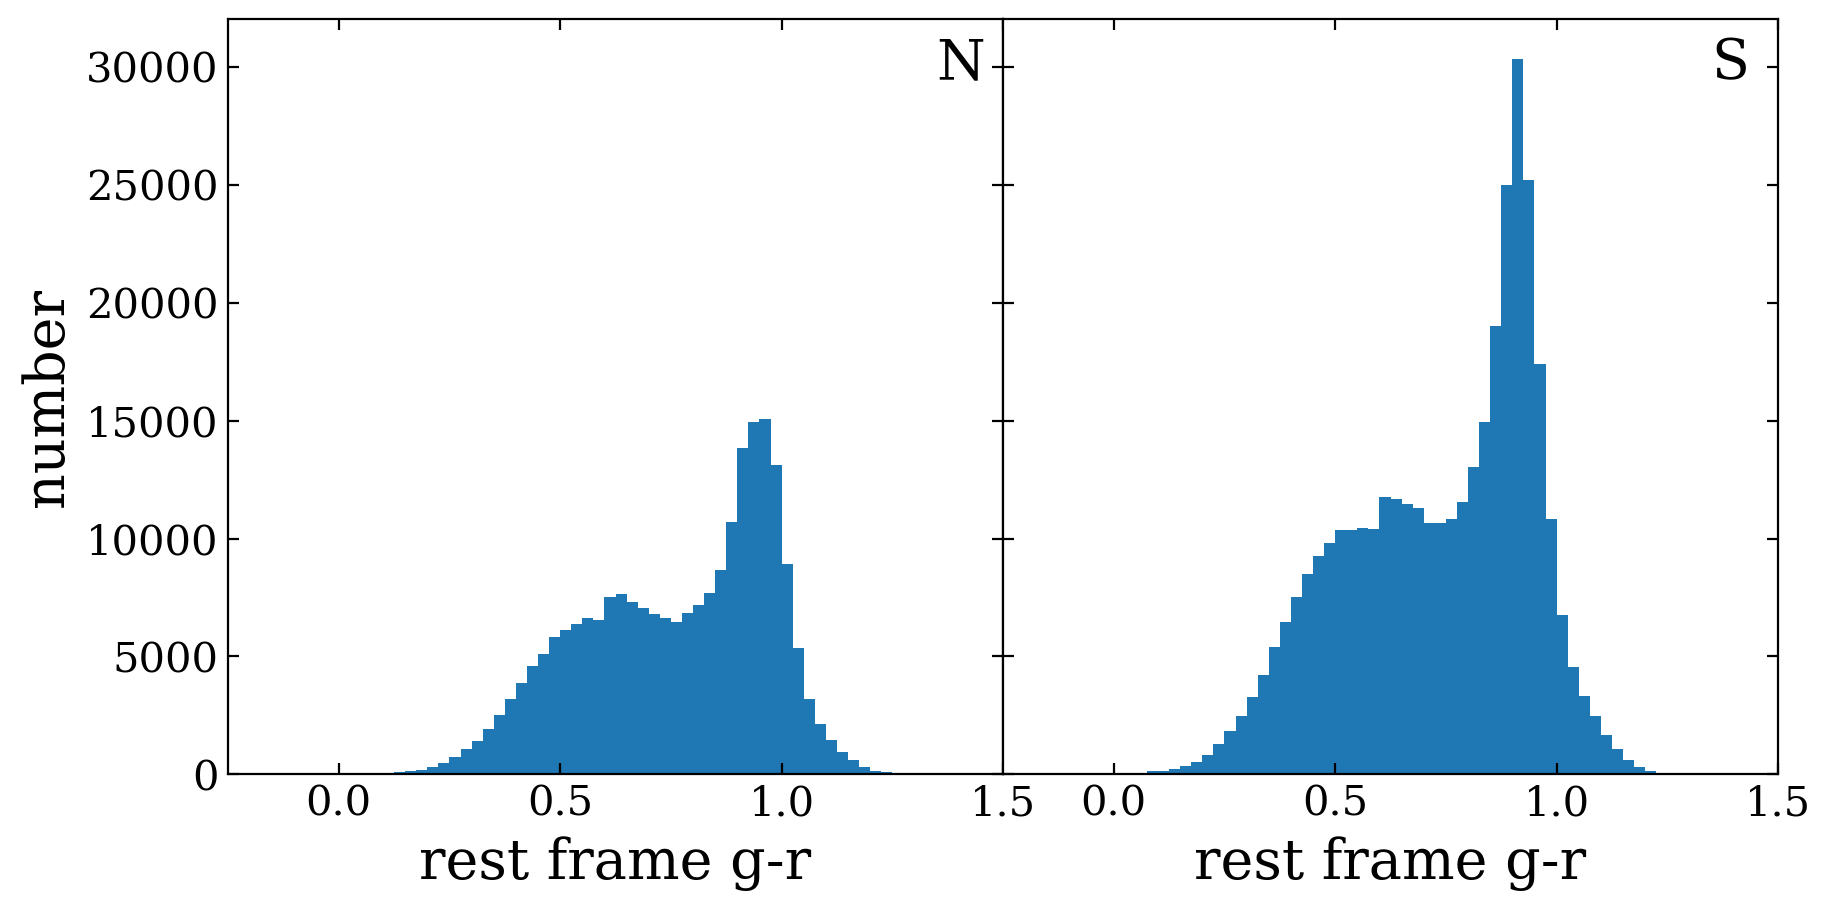

In [9]:
s=20
plt.figure(figsize=(10,5),dpi=200)
ax1 = plt.subplot(121)
plt.text(1.35,29500, 'N', size=s)
ax1.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('rest frame g-r', size=s)
plt.ylabel('number', size=s)
plt.ylim(0,32000)
plt.xlim(-0.25,1.5)

ax2 = plt.subplot(122)
plt.text(1.35,29500, 'S', size=s)
ax2.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025))
plt.xlabel('rest frame g-r', size=s)
plt.ylim(0,32000)
plt.xlim(-0.25,1.5)
ax2.set_yticklabels([])

plt.subplots_adjust(wspace=0)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.savefig('../figures/interim/da02_restcolour_hist.png')

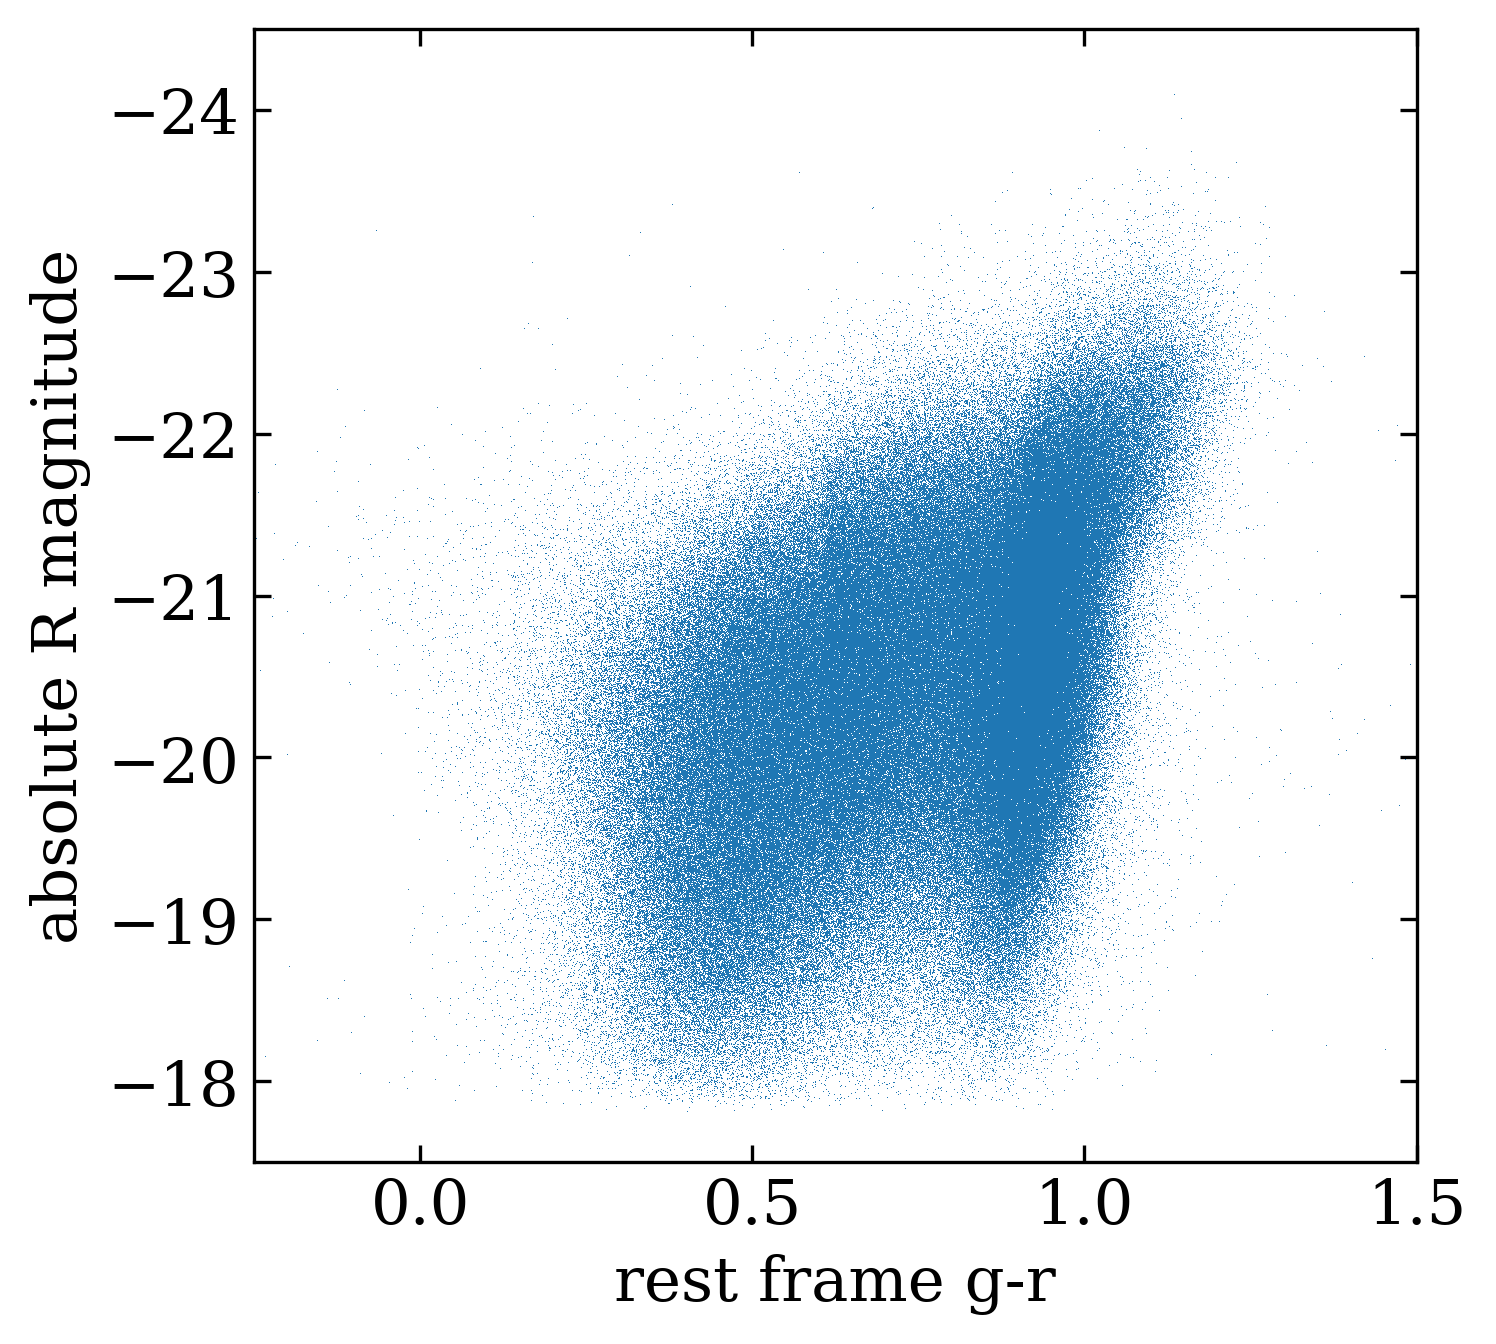

In [41]:
fig, ax = plt.subplots(figsize=(5,5),dpi=300)

plt.plot(data['REST_GMR_0P1'], data['ABSMAG_RP1'], lw=0, marker=',') #bins=[10000,100])#
plt.xlabel('rest frame g-r')
plt.ylabel('absolute R magnitude')
plt.xlim(-0.25,1.5)
plt.ylim(-24.5,-17.5)
plt.gca().invert_yaxis()
ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)
plt.savefig('../figures/interim/da02_colour_magnitude.png')

In [47]:
import matplotlib.gridspec as gridspec

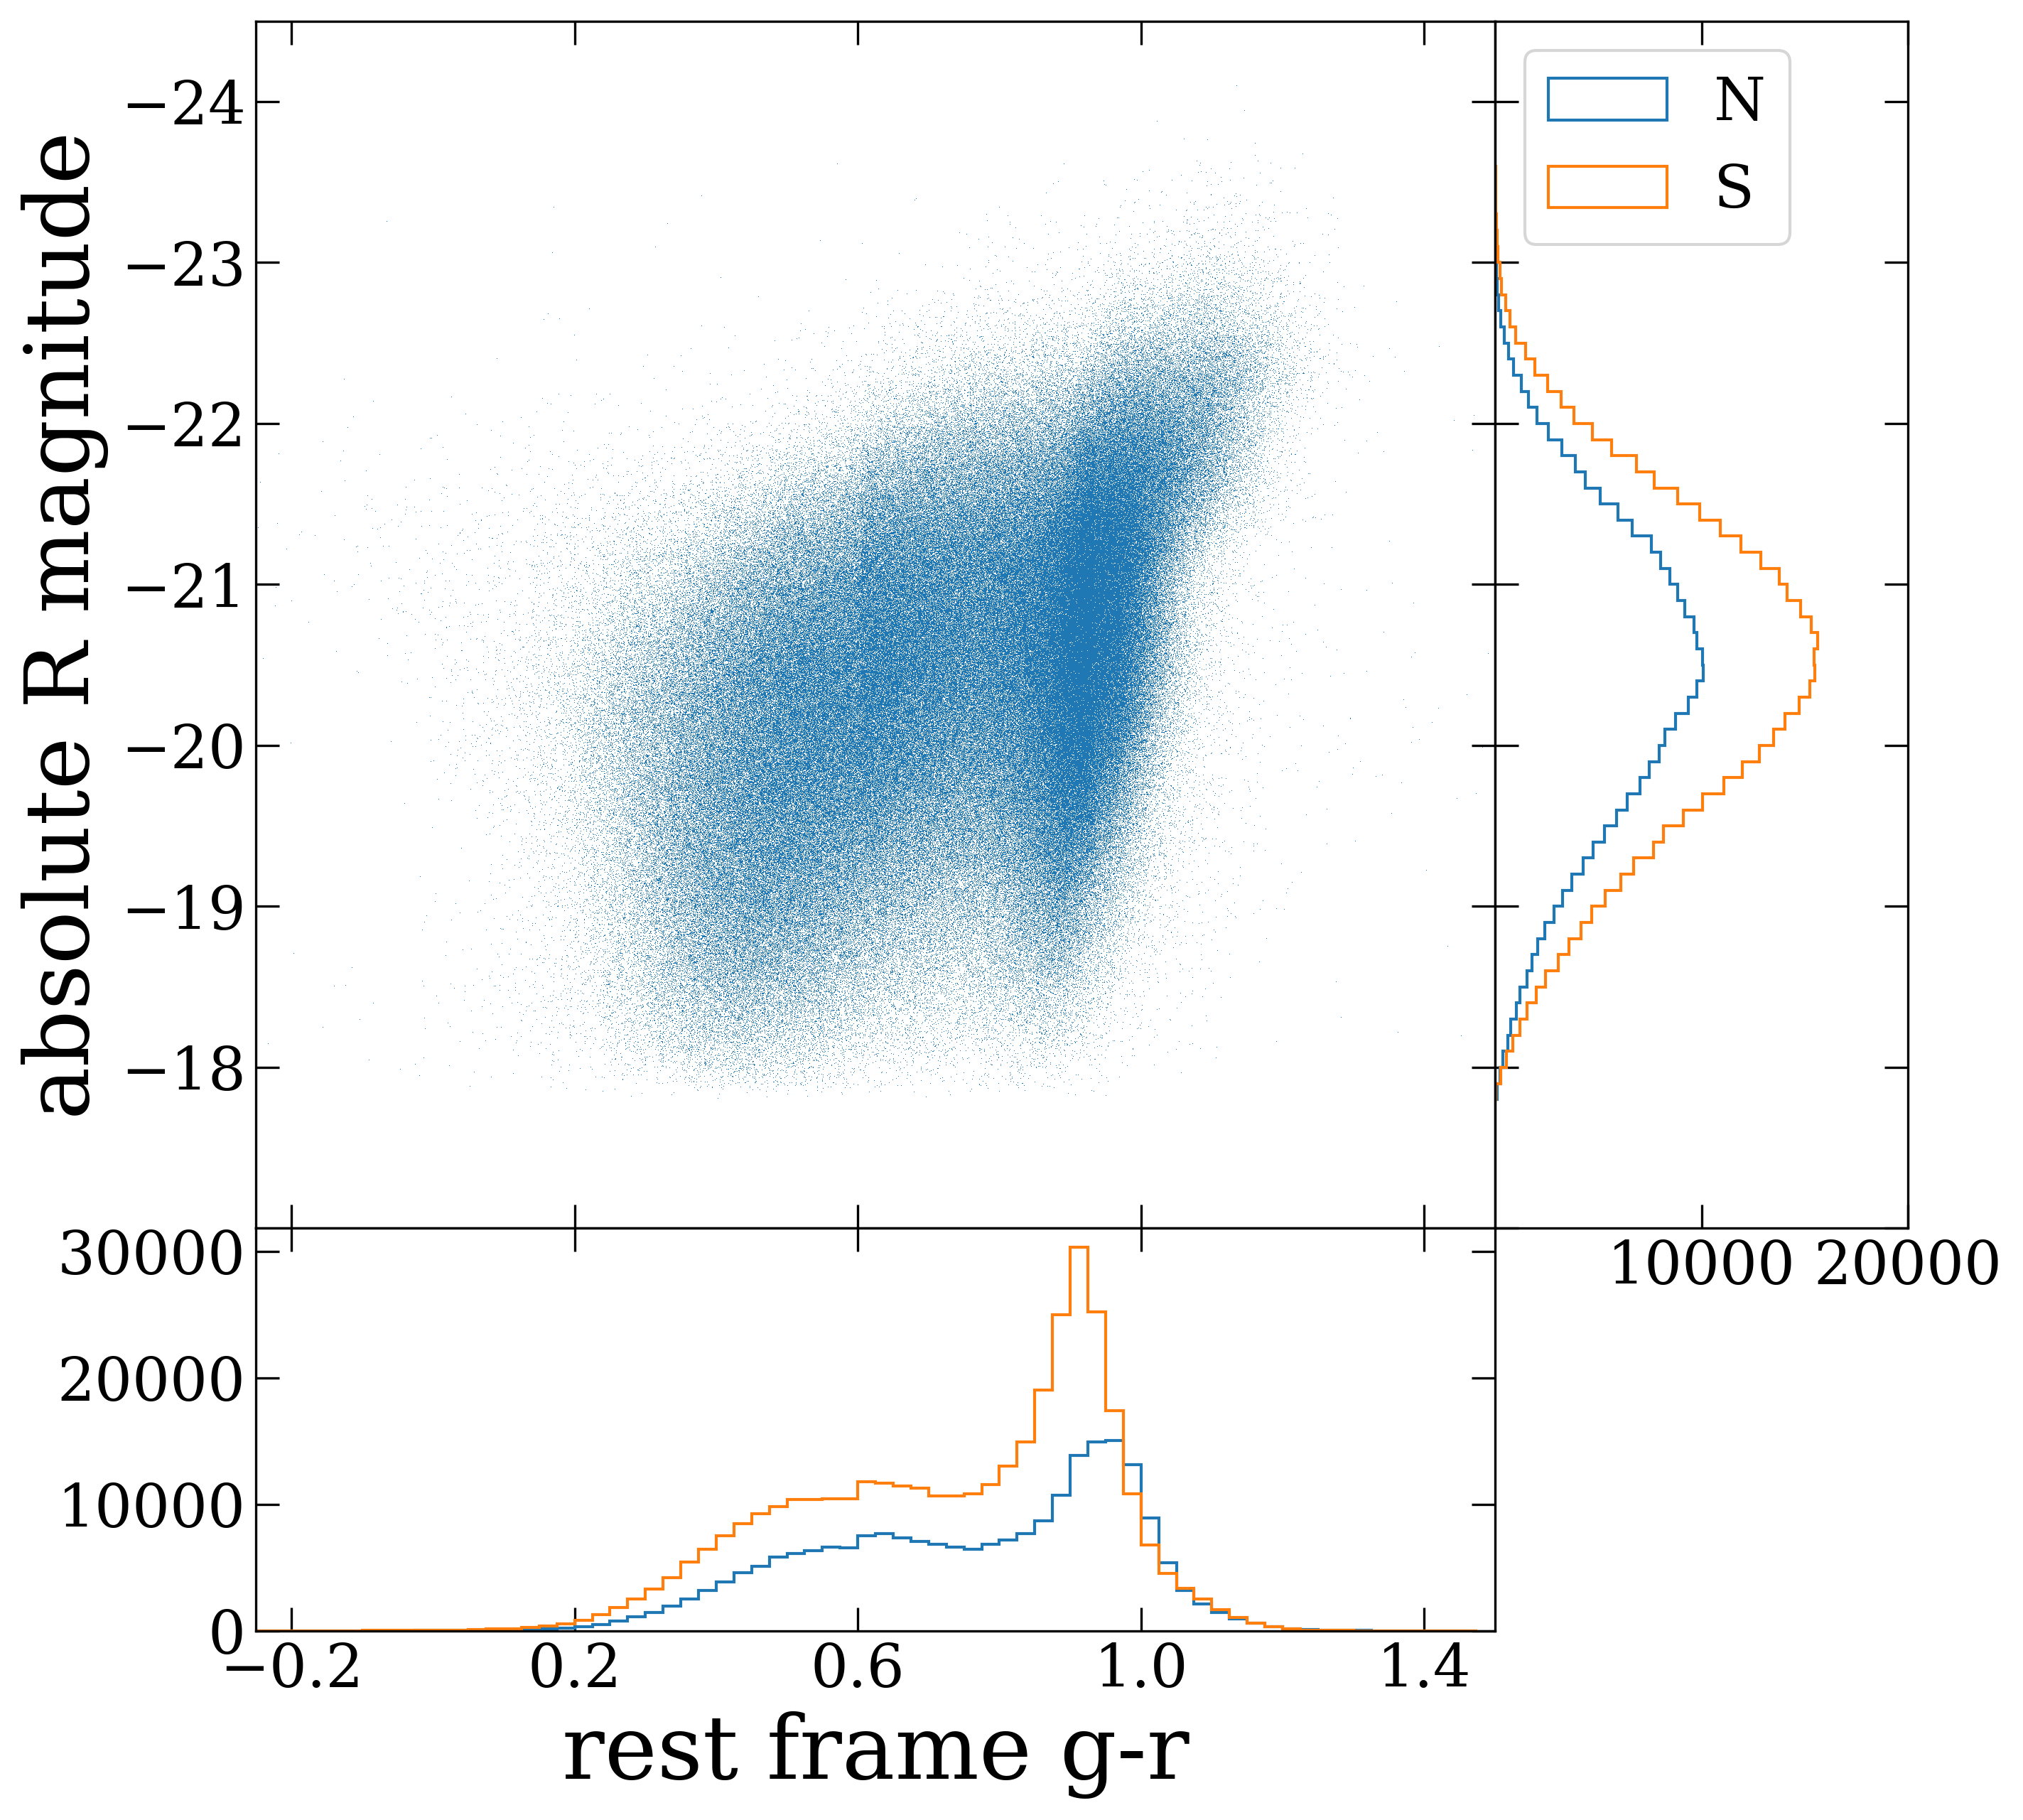

In [110]:
s=30
fig = plt.figure(figsize=(10,10),dpi=300)
gs = fig.add_gridspec(4, 4)

ax1 = fig.add_subplot(gs[:3, :3])
ax1.plot(data['REST_GMR_0P1'], data['ABSMAG_RP1'], lw=0, marker=',') #,bins=[10000,100])#
plt.ylabel('absolute R magnitude', size=s)
plt.xlim(-0.25,1.5)
plt.ylim(-24.5,-17)
plt.gca().invert_yaxis()
plt.xticks(np.arange(-0.2,1.8,0.4))
ax1.set_xticklabels([])
plt.xticks(fontsize=s-10)
plt.yticks([-18,-19,-20,-21,-22,-23,-24],fontsize=s-10)

ax2 = fig.add_subplot(gs[:3, 3])
ax2.hist(N['ABSMAG_RP1'], bins=np.arange(-25,-10,0.1),orientation='horizontal', histtype='step', label='N')
ax2.hist(S['ABSMAG_RP1'], bins=np.arange(-25,-10,0.1),orientation='horizontal', histtype='step', label='S')
plt.ylim(-24.5,-17)
plt.gca().invert_yaxis()
ax2.set_yticklabels([])
plt.xticks([10000,20000])
plt.xticks(fontsize=s-10)
plt.yticks(fontsize=s-10)
plt.legend(loc='upper left', fontsize=s-10)

ax3 = fig.add_subplot(gs[3, :3])
ax3.hist(N['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), histtype='step')
ax3.hist(S['REST_GMR_0P1'], bins=np.arange(-0.5,1.5,0.025), histtype='step')
plt.xlabel('rest frame g-r', size=s)
plt.xlim(-0.25,1.5)
plt.xticks(np.arange(-0.2,1.8,0.4),fontsize=s-10)
plt.yticks(fontsize=s-10)


ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)
ax3.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=8)

plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('../figures/interim/da02_dists.png')

(array([     0,      5,      8, ..., 599196, 599197, 599198]),)


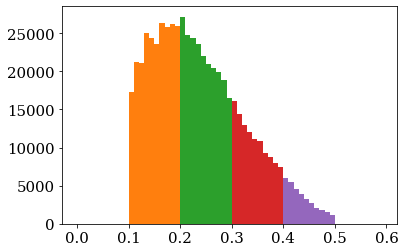

In [10]:
z01 = np.where(np.logical_and(data['Z'] > 0, data['Z'] < 0.1))
z12 = np.where(np.logical_and(data['Z'] > 0.1, data['Z'] < 0.2))
z23 = np.where(np.logical_and(data['Z'] > 0.2, data['Z'] < 0.3))
z34 = np.where(np.logical_and(data['Z'] > 0.3, data['Z'] < 0.4))
z45 = np.where(np.logical_and(data['Z'] > 0.4, data['Z'] < 0.5))
print(z12)
plt.figure()
plt.hist(data['Z'][z01], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z12], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z23], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z34], bins=np.arange(0,0.6,0.01))
plt.hist(data['Z'][z45], bins=np.arange(0,0.6,0.01))
plt.show()


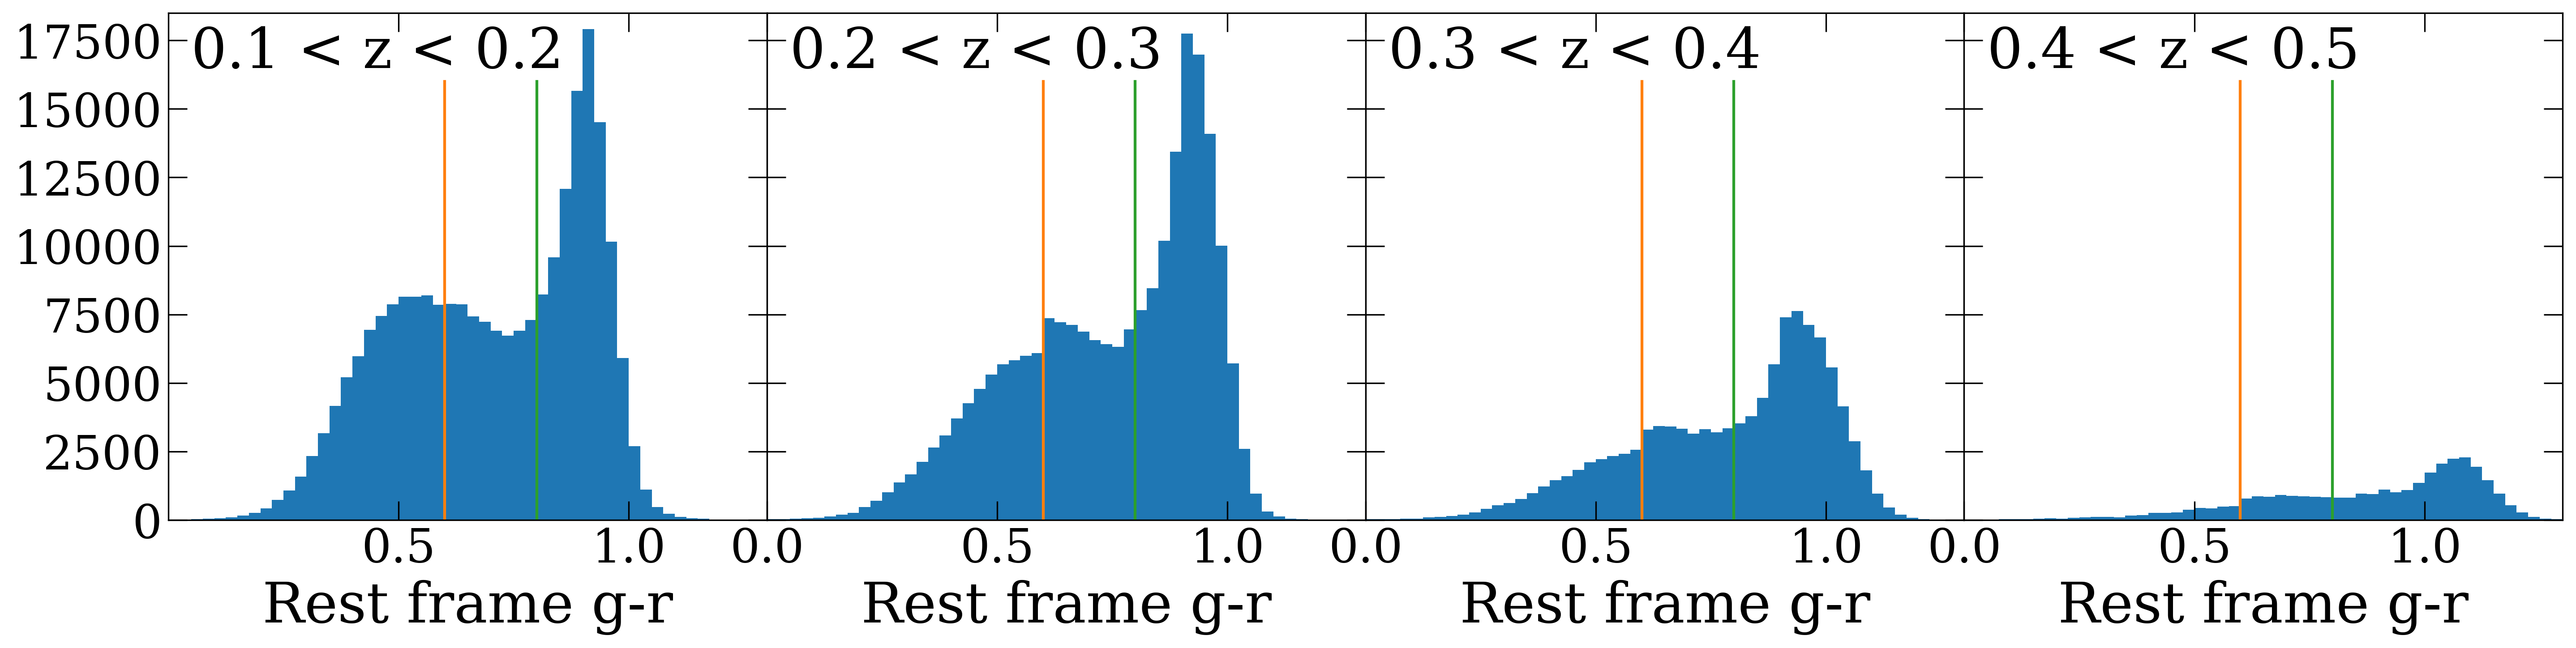

In [113]:
s=30
plt.figure(figsize=(23,5),dpi=300)
ylim=18500
ax1 = plt.subplot(141)
plt.text(0.05,16500,'0.1 < z < 0.2',size=s)
plt.hist(data['REST_GMR_0P1'][z12], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-2500])
plt.plot([0.8,0.8],[0,ylim-2500])
plt.xlabel('Rest frame g-r', size=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0.5,1,],fontsize=s-5)
plt.yticks(fontsize=s-5)

ax2 = plt.subplot(142)
plt.text(0.05,16500,'0.2 < z < 0.3',size=s)
plt.hist(data['REST_GMR_0P1'][z23], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-2500])
plt.plot([0.8,0.8],[0,ylim-2500])
plt.xlabel('Rest frame g-r', size=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1,],fontsize=s-5)
plt.yticks(fontsize=s-10)

ax3 = plt.subplot(143)
plt.text(0.05,16500,'0.3 < z < 0.4',size=s)
plt.hist(data['REST_GMR_0P1'][z34], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-2500])
plt.plot([0.8,0.8],[0,ylim-2500])
plt.xlabel('Rest frame g-r', size=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1,],fontsize=s-5)
plt.yticks(fontsize=s-10)

ax4 = plt.subplot(144)
plt.text(0.05,16500,'0.4 < z < 0.5',size=s)
plt.hist(data['REST_GMR_0P1'][z45], bins=np.arange(-0.5,1.5,0.025))
plt.plot([0.6,0.6],[0,ylim-2500])
plt.plot([0.8,0.8],[0,ylim-2500])
plt.xlabel('Rest frame g-r', size=s)
plt.ylim(0,ylim)
plt.xlim(0,1.3)
plt.xticks([0,0.5,1,],fontsize=s-5)
plt.yticks(fontsize=s-10)

ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=10)
ax2.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=10)
ax2.set_yticklabels([])
ax3.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=10)
ax3.set_yticklabels([])
ax4.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=10)
ax4.set_yticklabels([])

plt.subplots_adjust(wspace=0)

plt.savefig('../figures/interim/da02_restcolour_hist_zsplit.pdf',bbox_inches='tight')

In [12]:
data['RA','DEC']

RA,DEC
float64,float64
268.7008850398322,58.31651750837625
268.7121644210125,58.17137871856034
268.7447179685751,58.35164090788789
270.5073482253405,59.33896919077583
268.5121713053863,58.81550252397294
268.72025843577376,58.150995263304566
268.6773406567538,58.196956322063585
268.86868202000977,58.30892044280674
268.8319239967375,58.17904527599571


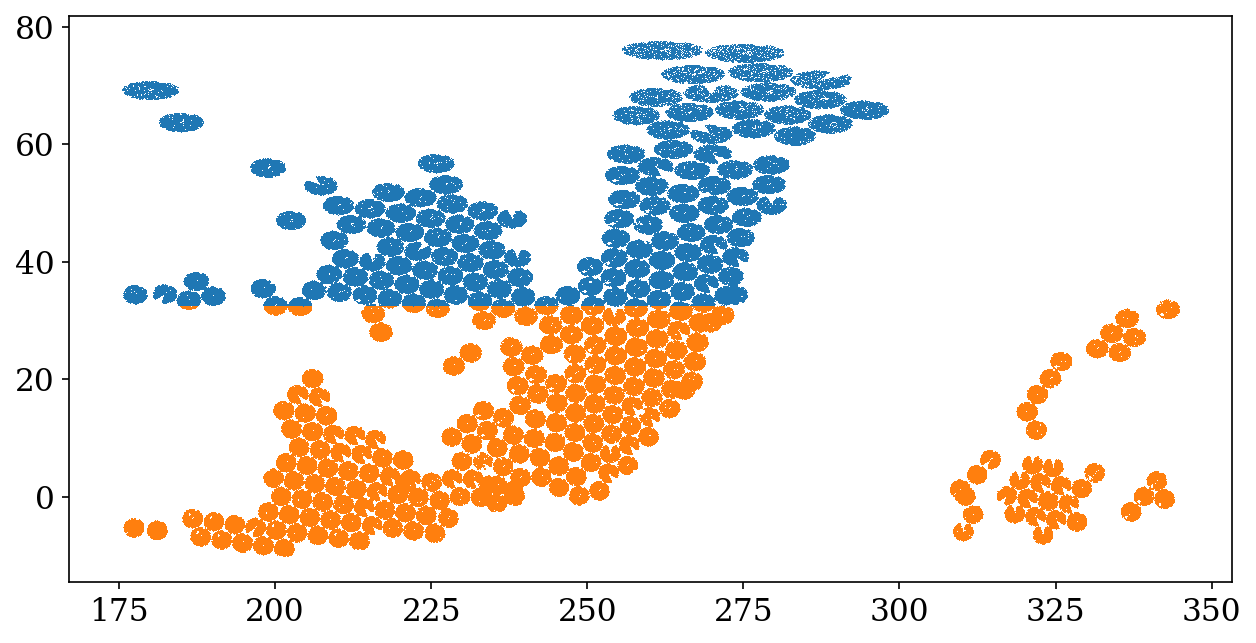

In [13]:
spike = np.where(np.logical_and(data['REST_GMR_0P1'] > 0.6, data['REST_GMR_0P1'] < 0.76))
plt.figure(figsize=(10,5),dpi=150)
plt.plot(N['RA'], N['DEC'], lw=0, marker=',')
plt.plot(S['RA'], S['DEC'], lw=0, marker=',')
#plt.plot(data['RA'][spike], data['DEC'][spike], lw=0, marker=',')
plt.show()

In [14]:
def ra_moll(ra):
    return np.deg2rad(180-ra)

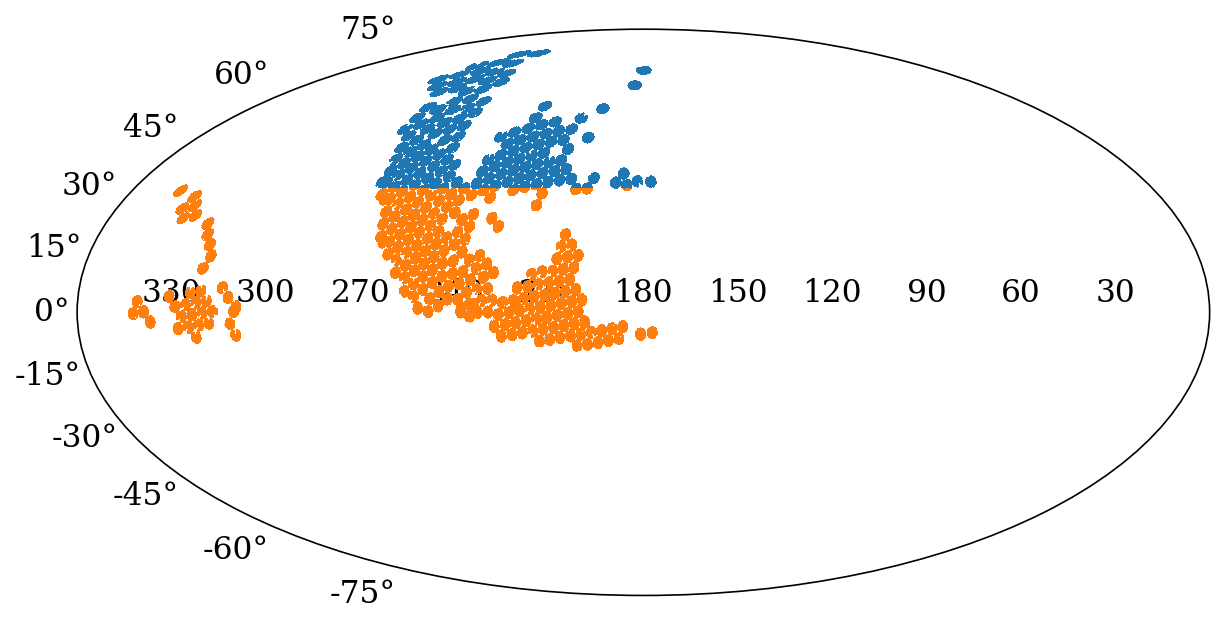

In [15]:
spike = np.where(np.logical_and(data['REST_GMR_0P1'] > 0.6, data['REST_GMR_0P1'] < 0.76))
plt.figure(figsize=(10,5),dpi=150)
ax = plt.subplot(projection="mollweide")
ax.plot(ra_moll(N['RA']), np.deg2rad(N['DEC']), lw=0, marker=',')
ax.plot(ra_moll(S['RA']), np.deg2rad(S['DEC']), lw=0, marker=',')
#plt.plot(data['RA'][spike], data['DEC'][spike], lw=0, marker=',')
ax.set_xticks([np.deg2rad(-150),np.deg2rad(-120),np.deg2rad(-90),np.deg2rad(-60),np.deg2rad(-30),np.deg2rad(0),np.deg2rad(30),np.deg2rad(60),np.deg2rad(90),np.deg2rad(120),np.deg2rad(150)],
             [180--150,180--120,180--90,180--60,180--30,180-0,180-30,180-60,180-90,180-120,180-150])
plt.savefig('../figures/week9/da02_sky_coverage_mollweide.png')

In [16]:
dec_slice = np.where(np.logical_and(data['DEC'] >= 30, data['DEC'] <= 35))[0]
dec_slice_spike = np.intersect1d(dec_slice, spike)
print(dec_slice, spike, dec_slice_spike)

[  3505   3506   3507 ... 599153 599154 599155] (array([     0,     14,     26, ..., 599189, 599191, 599192]),) [  3517   3518   3530 ... 599112 599122 599129]


3.062954497159865 6.017365574273924


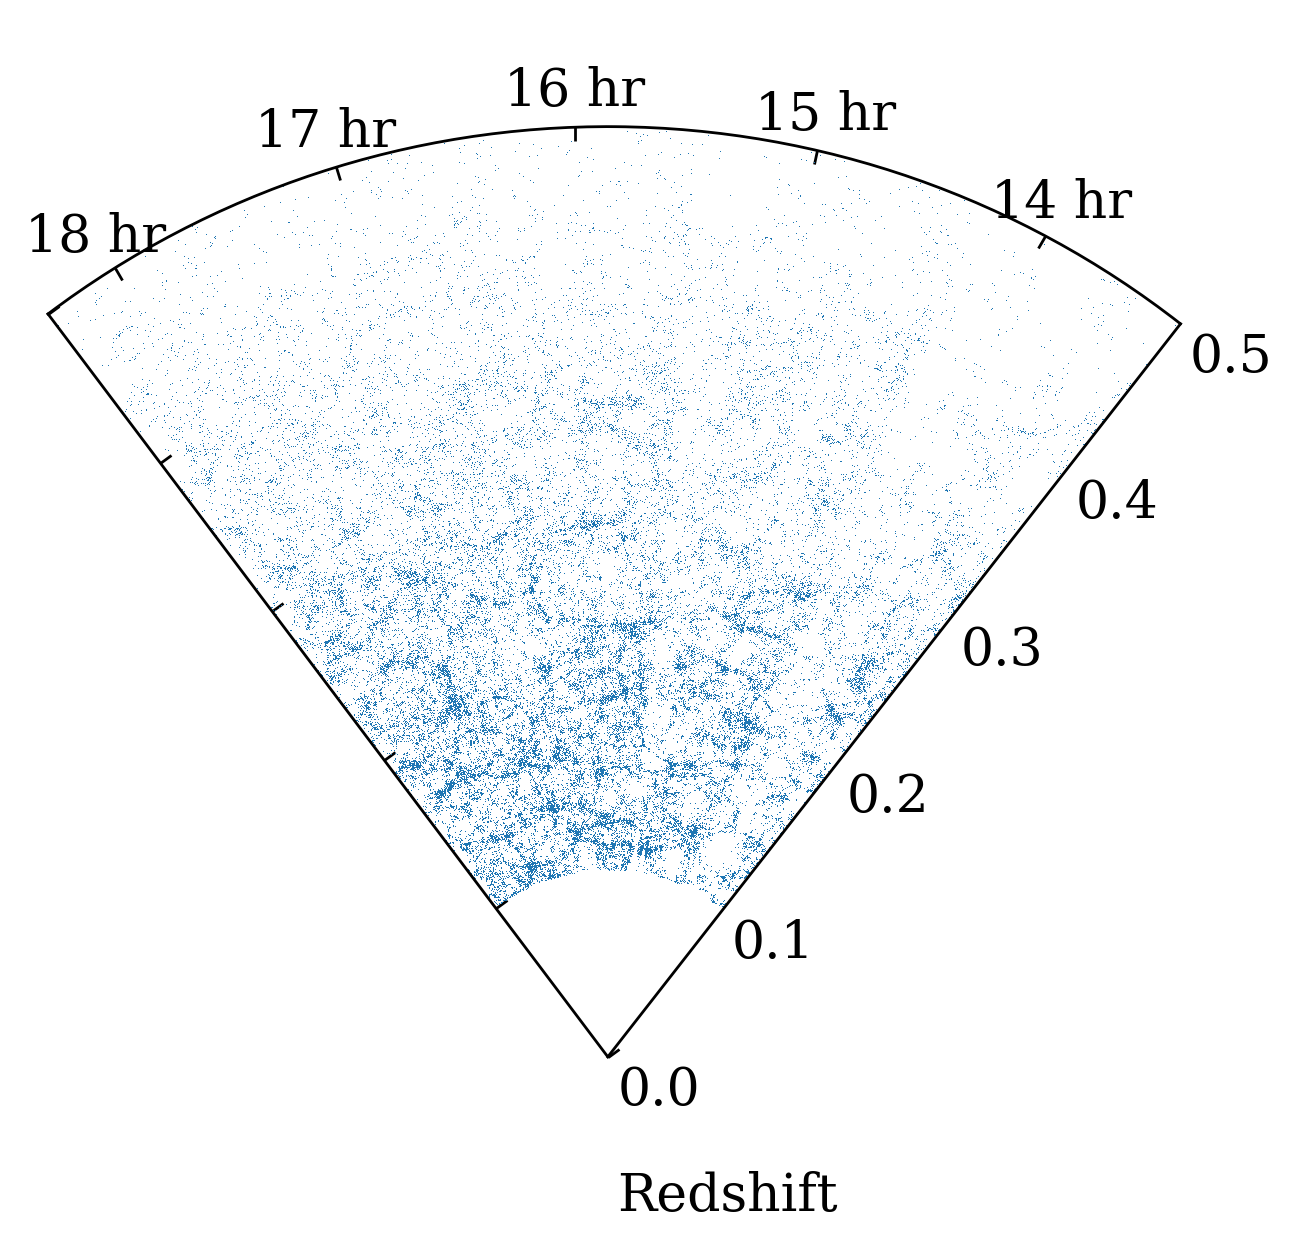

In [17]:
RA_rad = np.deg2rad(data['RA'])
print(np.min(RA_rad),np.max(RA_rad))

fig, ax = plt.subplots(figsize=(10,6),subplot_kw={'projection': 'polar'}, dpi=250)
plt.grid(False)
ax.set_xticks([np.deg2rad(210),np.deg2rad(225),np.deg2rad(240),np.deg2rad(255),np.deg2rad(270)])
ax.set_xticklabels(['14 hr', '15 hr', '16 hr', '17 hr', '18 hr'])
ax.plot(RA_rad[dec_slice],data['Z'][dec_slice], lw=0, marker=',', color='tab:blue')
#ax.plot(RA_rad[dec_slice_spike],data['Z'][dec_slice_spike], lw=0, marker=',', color='tab:orange')
ax.set_theta_offset(np.deg2rad(212))
plt.ylim(0,0.5)
plt.xlim(np.deg2rad(200),np.deg2rad(275))
#plt.ylabel('Redshift', rotation=-55, y=0.66) #y=0.65
plt.xlabel('Redshift', x=0.6)

ax.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.savefig('../figures/interim/da02_cone_plot.png')

FileNotFoundError: [Errno 2] No such file or directory: '../figures/week8-9/da02_Fig4.png'

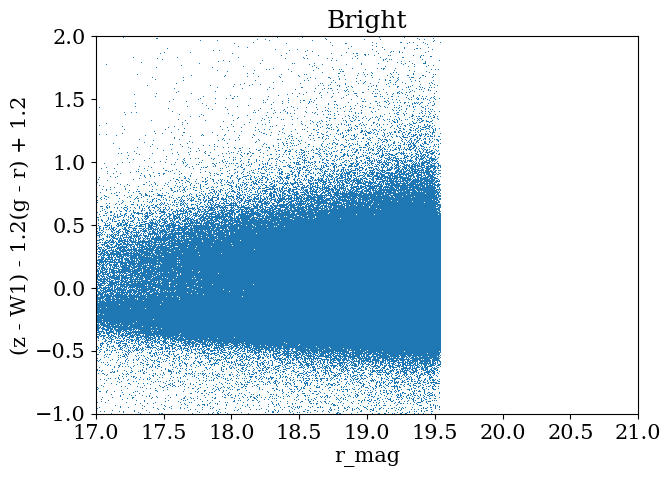

In [18]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
plt.figure(figsize=(7,5), dpi=100)
plt.title('Bright')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.savefig('../figures/week8-9/da02_Fig4.png')

#no faint